# Importing The Libraries

In [1]:
import pandas as pd

import numpy as np

import pickle

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

import sklearn

from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import RandomizedSearchCV

import imblearn

from imblearn.under_sampling import RandomUnderSampler

from xgboost import XGBClassifier

from sklearn.preprocessing import scale

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

import warnings

warnings.filterwarnings('ignore')

# Reading The Dataset

In [2]:
df=pd.read_csv("loan_prediction.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.shape

(614, 13)

In [6]:
df=df.drop(columns=["Loan_ID"],axis=1)

# Uni-Variate Analysis

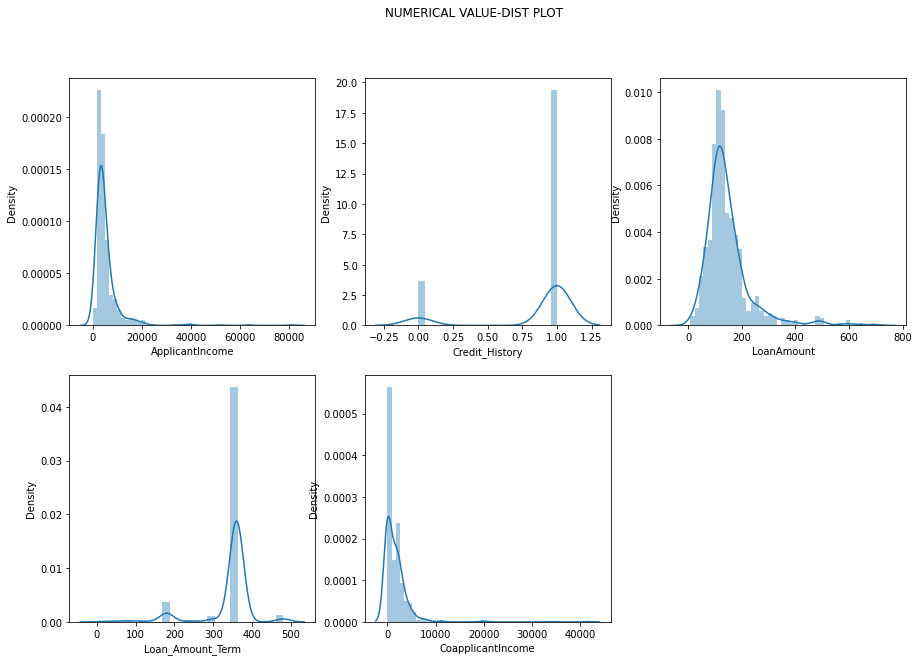

In [7]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.distplot(df["ApplicantIncome"])
plt.subplot(2,3,2)
sns.distplot(df["Credit_History"])
plt.subplot(2,3,3)
sns.distplot(df["LoanAmount"])
plt.subplot(2,3,4)
sns.distplot(df["Loan_Amount_Term"])
plt.subplot(2,3,5)
sns.distplot(df["CoapplicantIncome"])
plt.suptitle("NUMERICAL VALUE-DIST PLOT")
plt.show()

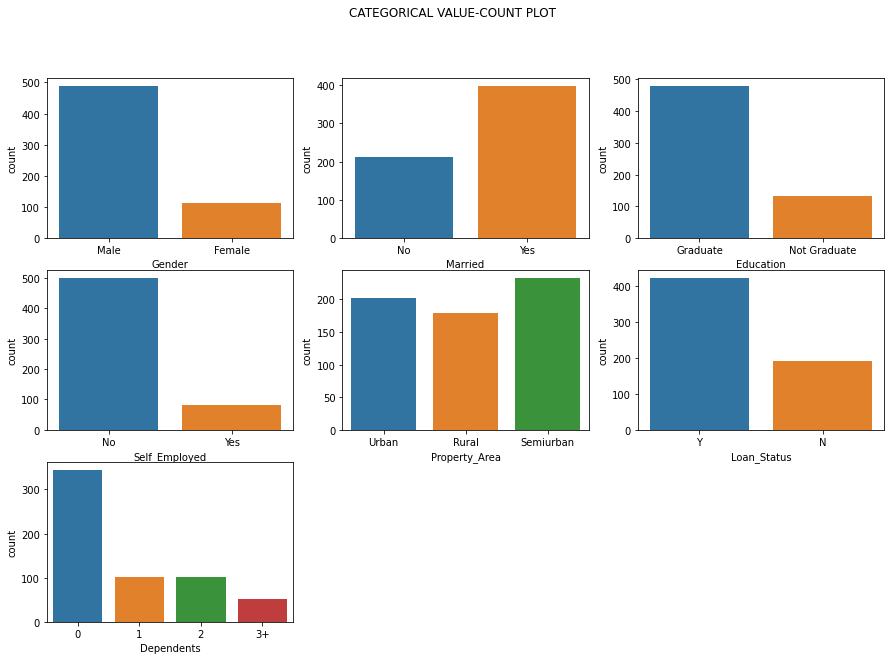

In [8]:
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
sns.countplot(df["Gender"])
plt.subplot(3,3,2)
sns.countplot(df["Married"])
plt.subplot(3,3,3)
sns.countplot(df["Education"])
plt.subplot(3,3,4)
sns.countplot(df["Self_Employed"])
plt.subplot(3,3,5)
sns.countplot(df["Property_Area"])
plt.subplot(3,3,6)
sns.countplot(df["Loan_Status"])
plt.subplot(3,3,7)
sns.countplot(df["Dependents"])
plt.suptitle("CATEGORICAL VALUE-COUNT PLOT")
plt.show()

# Bivariate Analysis

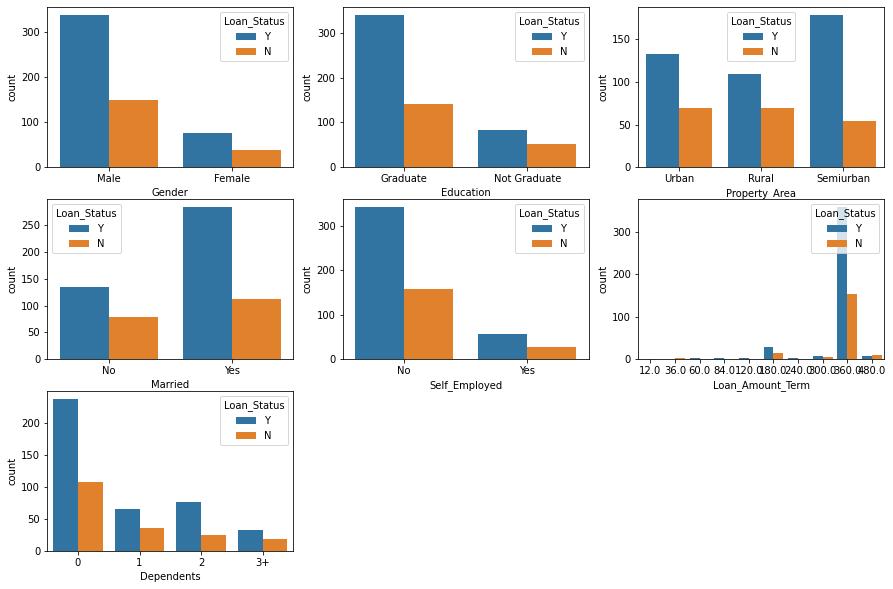

In [9]:
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
sns.countplot(df["Gender"],hue=df["Loan_Status"])
plt.subplot(3,3,2)
sns.countplot(df["Education"],hue=df["Loan_Status"])
plt.subplot(3,3,3)
sns.countplot(df["Property_Area"],hue=df["Loan_Status"])
plt.subplot(3,3,4)
sns.countplot(df["Married"],hue=df["Loan_Status"])
plt.subplot(3,3,5)
sns.countplot(df["Self_Employed"],hue=df["Loan_Status"])
plt.subplot(3,3,6)
sns.countplot(df["Loan_Amount_Term"],hue=df["Loan_Status"])
plt.subplot(3,3,7)
sns.countplot(df["Dependents"],hue=df["Loan_Status"])
plt.show()

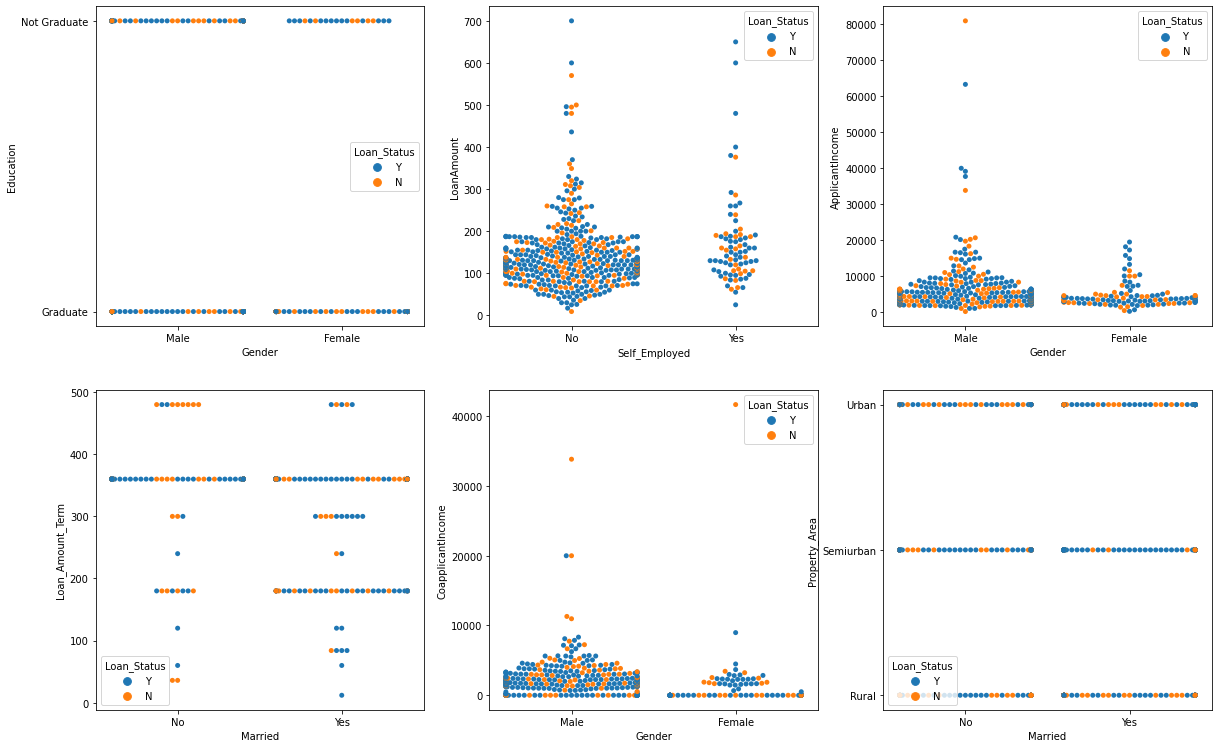

In [10]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.swarmplot(df['Gender'],df['Education'],hue=df['Loan_Status'])
plt.subplot(3,3,2)
sns.swarmplot(df['Self_Employed'],df['LoanAmount'],hue=df['Loan_Status'])
plt.subplot(3,3,3)
sns.swarmplot(df['Gender'],df['ApplicantIncome'],hue=df['Loan_Status'])
plt.subplot(3,3,4)
sns.swarmplot(df['Married'],df['Loan_Amount_Term'],hue=df['Loan_Status'])
plt.subplot(3,3,5)
sns.swarmplot(df['Gender'],df['CoapplicantIncome'],hue=df['Loan_Status'])
plt.subplot(3,3,6)
sns.swarmplot(df['Married'],df['Property_Area'],hue=df['Loan_Status'])
plt.show()

# Multivariate Analysis

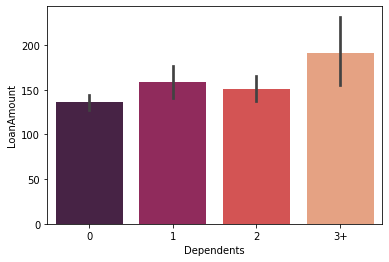

In [11]:
#Visualizations Dependents vs LoanAmount vs Gender
sns.barplot(df.Dependents,df.LoanAmount, hue_order=df.Gender ,palette="rocket")
plt.show()

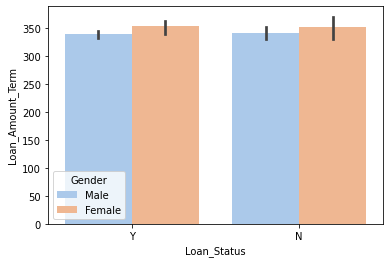

In [12]:
#Visualizations Loan_Status vs Loan_Amount_Term vs Gender
sns.barplot(df.Loan_Status,df.Loan_Amount_Term,hue=df.Gender, palette="pastel")
plt.show()

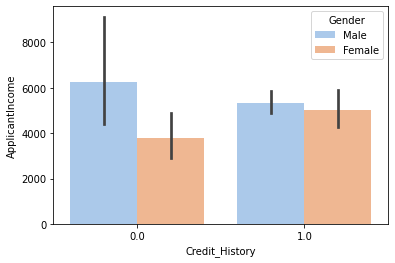

In [13]:
# Credit_History vs ApplicantIncome and Gender
sns.barplot(df['Credit_History'], df['ApplicantIncome'], hue = df['Gender'], palette = 'pastel')
plt.show()

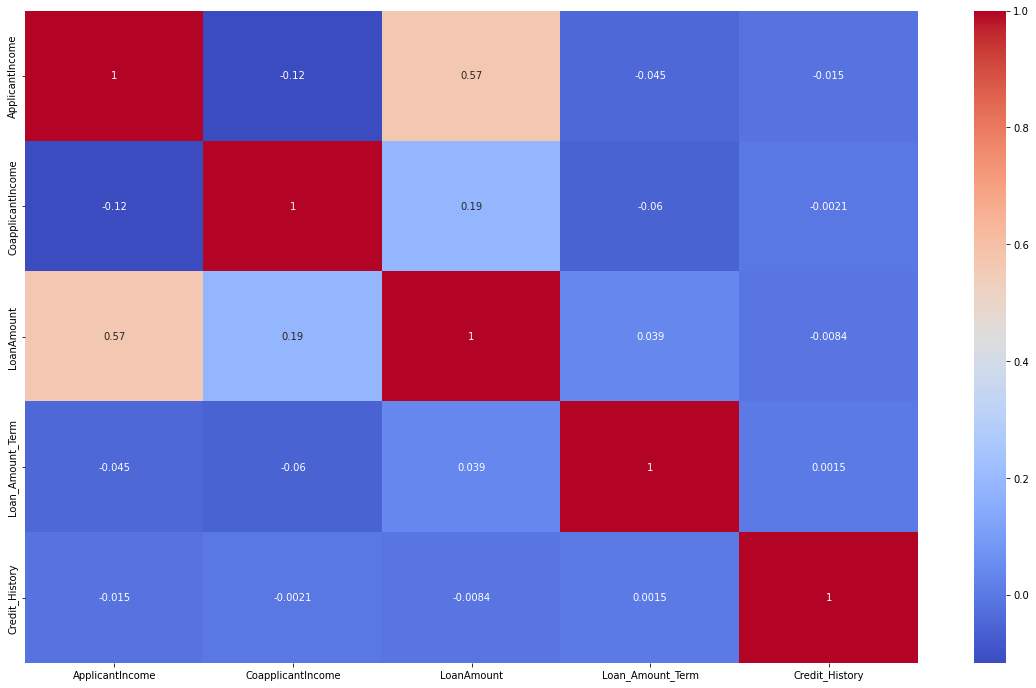

In [14]:
cor=df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

# Descriptive Analysis

In [15]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Data Pre-Processing

## Checking For Null Values

In [16]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [18]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [19]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Handling Categorical Values

In [20]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [21]:
le=LabelEncoder()

In [22]:
df.Gender=le.fit_transform(df.Gender)
df.Married=le.fit_transform(df.Married)
df.Education=le.fit_transform(df.Education)
df.Self_Employed=le.fit_transform(df.Self_Employed)
df.Property_Area=le.fit_transform(df.Property_Area)
df.Loan_Status=le.fit_transform(df.Loan_Status)
df.Dependents=le.fit_transform(df.Dependents)

In [23]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


# Spliting into dependent and independent data

In [24]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [25]:
x=df.iloc[:,:-1]
y=df.Loan_Status

In [26]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2


In [27]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

# Scaling The Data

In [28]:
x_scale=pd.DataFrame(scale(x),columns=x.columns)
x_scale.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.072991,-0.554487,0.000000,0.279851,0.45164,1.223298
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.134412,-0.038732,-0.219273,0.279851,0.45164,-1.318513
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.393747,-0.554487,-0.957641,0.279851,0.45164,1.223298
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.462062,0.251980,-0.314547,0.279851,0.45164,1.223298
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.097728,-0.554487,-0.064454,0.279851,0.45164,1.223298


# Balancing The Dataset

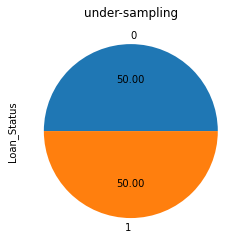

In [29]:
rus=RandomUnderSampler(sampling_strategy=1)
x_res,y_res=rus.fit_resample(x,y)
ax=y_res.value_counts().plot.pie(autopct='%.2f')
_=ax.set_title("under-sampling")

# Splitting Data Into Train and Test

In [30]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=10)

In [31]:
xtrain.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
245,1,0,0,0,1,6050,4333.0,120.0,180.0,1.0,2
413,1,1,0,1,0,2253,2033.0,110.0,360.0,1.0,0
126,1,1,3,0,0,23803,0.0,370.0,360.0,1.0,0
531,1,1,3,0,0,4281,0.0,100.0,360.0,1.0,2
188,1,1,0,0,1,674,5296.0,168.0,360.0,1.0,0


In [32]:
xtest.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
285,1,0,0,0,0,3158,3053.0,89.0,360.0,1.000000,0
323,0,0,0,0,0,3166,2985.0,132.0,360.0,0.842199,0
482,1,1,0,0,0,2083,3150.0,128.0,360.0,1.000000,1
173,1,1,0,0,0,5708,5625.0,187.0,360.0,1.000000,1
518,1,0,0,0,0,4683,1915.0,185.0,360.0,1.000000,1


In [33]:
ytrain.head()

245    0
413    1
126    1
531    1
188    1
Name: Loan_Status, dtype: int64

In [34]:
ytest.head()

285    1
323    1
482    1
173    1
518    0
Name: Loan_Status, dtype: int64

# Model Building

# Random Forest Model

In [35]:
Rmodel=RandomForestClassifier(n_estimators=100)

In [36]:
Rmodel.fit(x_res,y_res)

RandomForestClassifier()

In [37]:
ypredR=Rmodel.predict(xtest)

In [38]:
ypred2R=Rmodel.predict(xtrain)

In [39]:
print("Random Forest Model Testing Accuracy")
print(accuracy_score(ytest,ypredR))
print("Random Forest Model Training Accuracy")
print(accuracy_score(ytrain,ypred2R))

Random Forest Model Testing Accuracy
0.9135135135135135
Random Forest Model Training Accuracy
0.9254079254079254
